In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
ls

Customers.csv                evaluation_silhouette.ipynb
clustering_evaluation.ipynb


In [3]:
data=pd.read_csv("https://raw.githubusercontent.com/HossainSanowar-Github/Clustering/main/Customers.csv")
df=data.copy()

In [4]:
df.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [8]:
df.isnull().sum()

CustomerID                0
Genre                     0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [9]:
#independet feature like Annual Insome, Spending Score
X=df.iloc[:,[3,4]].values

In [17]:
X[:,1]

array([39, 81,  6, 77, 40, 76,  6, 94,  3, 72, 14, 99, 15, 77, 13, 79, 35,
       66, 29, 98, 35, 73,  5, 73, 14, 82, 32, 61, 31, 87,  4, 73,  4, 92,
       14, 81, 17, 73, 26, 75, 35, 92, 36, 61, 28, 65, 55, 47, 42, 42, 52,
       60, 54, 60, 45, 41, 50, 46, 51, 46, 56, 55, 52, 59, 51, 59, 50, 48,
       59, 47, 55, 42, 49, 56, 47, 54, 53, 48, 52, 42, 51, 55, 41, 44, 57,
       46, 58, 55, 60, 46, 55, 41, 49, 40, 42, 52, 47, 50, 42, 49, 41, 48,
       59, 55, 56, 42, 50, 46, 43, 48, 52, 54, 42, 46, 48, 50, 43, 59, 43,
       57, 56, 40, 58, 91, 29, 77, 35, 95, 11, 75,  9, 75, 34, 71,  5, 88,
        7, 73, 10, 72,  5, 93, 40, 87, 12, 97, 36, 74, 22, 90, 17, 88, 20,
       76, 16, 89,  1, 78,  1, 73, 35, 83,  5, 93, 26, 75, 20, 95, 27, 63,
       13, 75, 10, 92, 13, 86, 15, 69, 14, 90, 32, 86, 15, 88, 39, 97, 24,
       68, 17, 85, 23, 69,  8, 91, 16, 79, 28, 74, 18, 83])

In [24]:
type(X)

numpy.ndarray

In [21]:
#Dependent feature
# there is no depemdent feature; we will use elbow methods to find the optimal number of clusters

from sklearn.cluster import KMeans

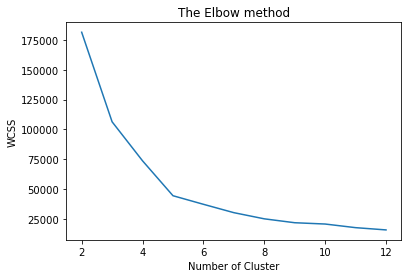

In [32]:
wcss=[]
for i in range(2,13):
    kmeans=KMeans(n_clusters=i, init='k-means++',random_state=0)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)
    
plt.plot(range(2,13),wcss)
plt.title('The Elbow method')
plt.xlabel('Number of Cluster')
plt.ylabel('WCSS')
plt.show()

In [33]:
kmenas=KMeans(n_clusters=5, init='k-means++')
y_kmeans=kmeans.fit_predict(X)# what will we get the output?
y_kmeans

array([ 3,  4,  5,  4,  3,  4,  5,  4,  5,  4,  5,  4,  5,  4,  5,  4,  3,
        4,  3,  4,  3,  4,  5,  4,  5,  4,  3, 11,  3,  4,  5,  4,  5,  4,
        5,  4,  5,  4,  3,  4,  3,  4,  3, 11,  3, 11, 11, 11, 11, 11, 11,
       11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11,
       11, 11, 11, 11, 11, 11,  1,  1,  1,  1,  1,  9,  1,  1,  9,  1,  1,
        1,  1,  1,  1,  1,  1,  9,  1,  9,  9,  1,  1,  1,  9,  1,  9,  1,
        1,  1,  1,  9,  1,  9,  9,  1,  1,  1,  9,  9,  1,  1,  9,  1,  9,
        1,  1,  9,  1,  2,  9,  8,  9,  2,  0,  8,  0,  8,  9,  8,  0,  2,
        0,  8,  0,  8,  0,  2,  9,  2,  0,  2,  9,  8,  0,  2,  0,  2,  0,
        8,  0,  2,  0,  8,  0,  8,  9,  2,  0,  2,  7,  8,  7,  2,  7,  8,
        0,  8,  0,  2,  0,  2,  7,  8,  7,  2,  7,  2,  7,  2,  7,  2,  7,
        6,  7,  6,  7,  6, 10,  6, 10,  6, 10,  6, 10,  6], dtype=int32)

In [35]:
kmeans.cluster_centers_

array([[ 77.94117647,  10.41176471],
       [ 59.64705882,  52.29411765],
       [ 82.38888889,  90.44444444],
       [ 28.18181818,  33.27272727],
       [ 24.95      ,  81.        ],
       [ 24.58333333,   9.58333333],
       [114.71428571,  78.42857143],
       [ 94.54545455,  22.90909091],
       [ 77.78571429,  73.28571429],
       [ 65.23809524,  40.14285714],
       [124.        ,  17.5       ],
       [ 44.32258065,  52.12903226]])

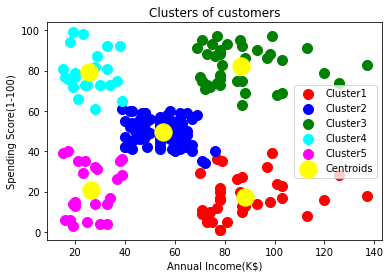

In [36]:
#Fitting K-MEans to the dataset
kmeans=KMeans(n_clusters=5,init='k-means++',random_state=0)
y_kmeans=kmeans.fit_predict(X)

#Visualize the clusters

plt.scatter(X[y_kmeans==0,0],X[y_kmeans==0,1],s=100,c='red',label='Cluster1')
plt.scatter(X[y_kmeans==1,0],X[y_kmeans==1,1],s=100,c='blue',label='Cluster2')
plt.scatter(X[y_kmeans==2,0],X[y_kmeans==2,1],s=100,c='green',label='Cluster3')
plt.scatter(X[y_kmeans==3,0],X[y_kmeans==3,1],s=100,c='cyan',label='Cluster4')
plt.scatter(X[y_kmeans==4,0],X[y_kmeans==4,1],s=100,c='magenta',label='Cluster5')

plt.scatter(kmeans.cluster_centers_[:,0],kmeans.cluster_centers_[:,1],s=300,c='yellow',label='Centroids')

plt.title('Clusters of customers')
plt.xlabel('Annual Income(K$)')
plt.ylabel('Spending Score(1-100)')
plt.legend()
plt.show()

Evaluation Metrics

In [37]:
from sklearn.metrics import silhouette_samples,silhouette_score
list_sl_avg=[]
for i in range(2,6):
    cluster_model=KMeans(n_clusters=i,init='k-means++')
    cluster_labels=cluster_model.fit_predict(X)
    sil_avg=silhouette_score(X,cluster_labels)
    list_sl_avg.append(sil_avg)
    
print(list_sl_avg)
    

[0.2968969162503008, 0.46761358158775435, 0.4931963109249047, 0.553931997444648]
